In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# torch.manual_seed(1)    # reproducible

import sklearn.datasets as datasets
X_,y_=datasets.make_regression(n_samples=5000,n_features=2,noise=0.1)
X = torch.from_numpy(X_).float()
y = torch.from_numpy(y_).float()
y=y.view(5000,1)

In [31]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        tanh = torch.nn.ReLU()
        x = tanh(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

In [32]:
class network(torch.nn.Module):
    def __init__(self,*layers):
        super(network, self).__init__()
        self.nLayers= len(layers)
        self.layers = layers
        self.linear = torch.nn.ModuleList()
        for i in range(len(layers)-1):
            self.linear.append(torch.nn.Linear(layers[i],layers[i+1]))
        
    def forward(self,out):
        tanh = torch.nn.ReLU()
        for i in range(self.nLayers-2):
            out = self.linear[i](out)
            out = tanh(out)
        out = self.linear[-1](out)
        return out

In [33]:
net = Net(n_feature=2, n_hidden=10, n_output=1)     # define the network
net=network(2,10,1)
print(net)  # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

network(
  (linear): ModuleList(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=1, bias=True)
  )
)


In [34]:
X[:,0].mean(),X[:,1].mean()

(tensor(-0.0096), tensor(-0.0047))

In [39]:
#plt.ion()   # something about plotting
def train(net,X,y,no_epochs,loss,optimizer):
    losses=[]
    #scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
    for t in range(2000):
        optimizer.zero_grad()   # clear gradients for next train
        prediction = net(X)     # input x and predict based on x


        loss = loss(prediction, y)     # must be (1. nn output, 2. target)


        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients
       # scheduler.step()

        if t % 5 == 0:
            losses.append(loss.data.numpy())
    return(losses)

In [36]:
losses=train(net,X,y,1000,loss_func,optimizer)

In [37]:
prediction=net(X)

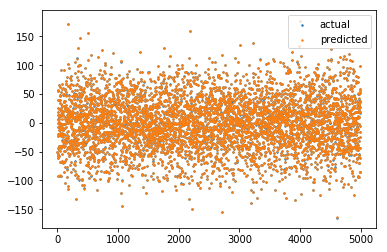

In [38]:
plt.scatter(range(len(y_)),y_,s=2,label="actual")
plt.scatter(range(len(y_)),prediction.data.numpy(),s=2,label="predicted")
plt.legend()


In [58]:
prediction.data.numpy()

array([[-0.25542778],
       [-0.2593901 ],
       [-0.23677677],
       [-0.2543118 ],
       [-0.23991649],
       [-0.25656205],
       [-0.26765808],
       [-0.2658574 ],
       [-0.28437454],
       [-0.2813181 ],
       [-0.24023402],
       [-0.23759967],
       [-0.24920437],
       [-0.28921822],
       [-0.26114845],
       [-0.2593752 ],
       [-0.24927789],
       [-0.25196648],
       [-0.2390195 ],
       [-0.2480261 ],
       [-0.28611332],
       [-0.25935438],
       [-0.28565502],
       [-0.2419544 ],
       [-0.24348973],
       [-0.23549864],
       [-0.2467116 ],
       [-0.2592908 ],
       [-0.2687834 ],
       [-0.27582586],
       [-0.27991292],
       [-0.24396428],
       [-0.22782558],
       [-0.27118063],
       [-0.25662503],
       [-0.25350878],
       [-0.25166172],
       [-0.275015  ],
       [-0.2713405 ],
       [-0.26469707],
       [-0.25516033],
       [-0.25167632],
       [-0.2655708 ],
       [-0.28995478],
       [-0.21945679],
       [-0

In [3]:
from torch.utils.data import TensorDataset, DataLoader

In [4]:
train_ds=TensorDataset(X,y)

In [5]:
batch_size = 10
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
next(iter(train_dl))

[tensor([[-8.3013e-01, -6.8221e-01],
         [ 8.7343e-01,  1.2822e+00],
         [-5.7356e-01,  1.9258e-01],
         [-7.4914e-01,  1.1862e-03],
         [-1.7220e-01, -1.7510e+00],
         [ 4.2742e-01,  4.2715e-01],
         [-5.3546e-01,  1.3550e+00],
         [-1.8241e-01, -7.8835e-02],
         [-1.3792e+00, -4.6717e-01],
         [ 7.4029e-01,  4.2373e-01]]),
 tensor([ -69.1843,  122.1307,   10.0593,   -8.8492, -154.6371,   42.2229,
          111.8280,   -9.0584,  -57.0136,   45.5705])]

In [25]:
def fit(num_epochs, model, loss_fn, opt):
    losses=[]
    for epoch in range(num_epochs):
        for xb,yb in train_dl:
            # Generate predictions
            pred = model(xb)
            loss = loss_fn(pred, yb)
            # Perform gradient descent
            loss.backward()
            losses.append(loss.data.numpy())
            opt.step()
            opt.zero_grad()
    print('Training loss: ', loss_fn(model(X), y))
    return(losses)

In [26]:
import torch.nn as nn
class SimpleNet(torch.nn.Module):
    # Initialize the layers
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(2, 10)
        self.act1 = nn.ReLU() # Activation function
        self.linear2 = nn.Linear(10, 1)
    
    # Perform the computation
    def forward(self, x):
        x = self.linear1(x)
        x = self.act1(x)
        x = self.linear2(x)
        return x

In [27]:
model =SimpleNet()

In [28]:
opt = torch.optim.SGD(model.parameters(), lr=0.001)
loss_fn = F.mse_loss


In [29]:
ld=fit(1000, model, loss_fn, opt)


Training loss:  tensor(4234.8418, grad_fn=<MseLossBackward>)


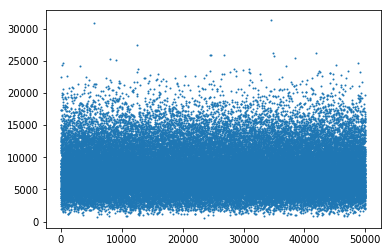

In [30]:
plt.scatter(range(len(ld)),ld,s=1)

In [102]:
torch.__version__

'1.0.0'

In [135]:
import pandas as pd
max_velocity=2
max_density = 5
max_length=5
max_viscosity=1

def funci(no_elements=10000):
    velocity = np.random.uniform(0,max_velocity,no_elements)
    density = np.random.uniform(0,max_density,no_elements)
    df=pd.DataFrame({"velocity":velocity,"density":density})

    fluid=df.velocity*df.density
    df["fluid_type"]=fluid
    return(df)

In [136]:
df=funci(1000)

In [137]:
np_df=df.values
X,y=np_df[:,:2],np_df[:,2]
X = torch.from_numpy(X).float()
y=torch.from_numpy(y.reshape((1000,1))).float()

In [138]:
net = Net(n_feature=2, n_hidden=10, n_output=1)     # define the network
print(net)  # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [139]:
losses=[]
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
for t in range(2000):
    optimizer.zero_grad()   # clear gradients for next train
    prediction = net(X)     # input x and predict based on x
    

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    scheduler.step()

    if t % 5 == 0:
        losses.append(loss.data.numpy())

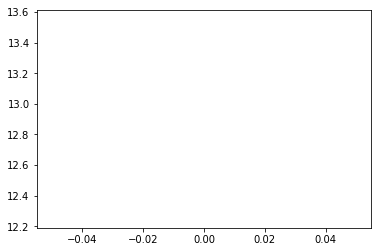

In [140]:
plt.plot(losses)